In [1]:
from qTools import *
import Cahit as ck

import scipy.sparse as sp

import numpy as np

from functools import partial
from multiprocessing import Pool, cpu_count

import matplotlib.pyplot as plt
import datetime

import copy

In [2]:
resonatorDimension = 20
g = 1.79
qfreq = 2
resFreq = 2

In [3]:
qSim = Simulation()
qSim.finalTime = 1.2
qSim.stepSize = 0.02
qSim.delStates = True

In [4]:
JCSys = QuantumSystem(name='JC')

In [5]:
cav = Cavity(dimension=resonatorDimension, frequency=resFreq)
JCSys.addSubSys(cav)

qub = JCSys.createSubSys(Qubit)
qub.frequency = qfreq

Cavity requires a dimension
Qubit requires a dimension


In [6]:
JCcoupling = JCSys.JC(cav, qub, g)

JCSys.initialState = [0,0]

In [7]:
digitalRabi = qProtocol(superSys=JCSys, name='RabiResults')
JCunitary = freeEvolution(ratio=0.5, superSys=JCSys)
bitFlip = xGate(implementation='instant', superSys=qub, fixed=True)
AJC = freeEvolution(superSys=JCSys)
qubset = JCunitary.createUpdate(system=qub, key='frequency', value=0)
digitalRabi.addStep(JCunitary, bitFlip, AJC, bitFlip, JCunitary)

In [8]:
qSim.addSubSys(JCSys, digitalRabi)

In [9]:
qubFreqSweep = qSim.Sweep.createSweep(system=qub, sweepKey='frequency', sweepList=np.arange(0, 1+0.5, 0.5))
cavFreqSweep = qSim.Sweep.createSweep(system=cav, sweepKey='frequency', multiParam=True)
cavFreqSweep.sweepList = np.arange(-4, 4+0.1, 0.1)

In [10]:
cavParity = parityEXP(cav.freeMat)
qubPop = qub.freeMat

def expectn(qSim, state1):
    #digitalRabi.qRes.results['cavParity'].append(expectationKet(cavParity, state1))
    qSim.qRes.results['cavParity'].append(expectationKet(cavParity, state1))
    qSim.qRes.allResults['RabiResults'].results['cavParity'].append(expectationKet(cavParity, state1))
    #qSim.qRes.qResults[digitalRabi].results['cavParity'].append(expectationKet(cavParity, state1))
    #qSim.qRes.results['cavParity2'].append(expectationKet(cavParity, state1))
    #qSim.qRes.result = fidelityKet(qSim.qSys.initialState, state1)

qSim.compute = expectn

In [11]:
nw = datetime.datetime.now()

results = qSim.run(p=True, coreCount='all')

en = datetime.datetime.now()
print(en-nw)

0:00:06.595152


In [ ]:
path, fname = qSim.qRes.saveAll(fileName='trial', path='/Users/cahitkargi/Desktop')

In [ ]:
print(qSim.qRes.states.keys())
print(digitalRabi.qRes.states.keys())
print(qSim.qRes.states['RabiResults'] is digitalRabi.qRes.states['RabiResults'])

In [ ]:
print(len(qSim.qRes.states['RabiResults']))
print(len(digitalRabi.qRes.states['RabiResults']))
print(len(qSim.qRes.states['RabiResults'][0]))
print(len(digitalRabi.qRes.states['RabiResults'][0]))
print(len(qSim.qRes.states['RabiResults'][0][0]))
print(len(digitalRabi.qRes.states['RabiResults'][0][0]))

In [ ]:
print(len(qSim.qRes.results['cavParity']))
print(len(digitalRabi.qRes.results['cavParity']))

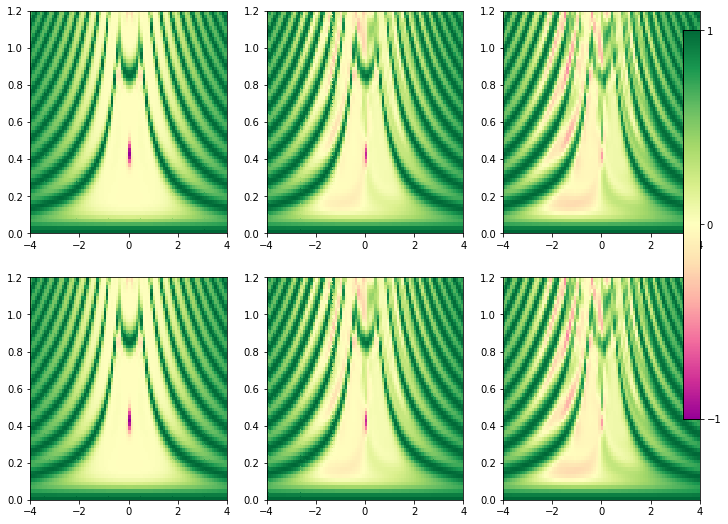

In [12]:
def plotRes(xList = cavFreqSweep.sweepList):
    fig = plt.figure(figsize=(12,9))
    setC = [0.88, 0.25, 0.02, 0.6]
    
    axGrids = ck.Plotting.Functions.grid(2, 3, fig=fig)

    ck.Plotting.SimplePlots.colorPlot(xList, [x*qSim.stepSize for x in range(qSim.steps+1)], qSim.qRes.results['cavParity'][0],ax=axGrids[0], gif=fig, setC=setC)
    ck.Plotting.SimplePlots.colorPlot(xList, [x*qSim.stepSize for x in range(qSim.steps+1)], qSim.qRes.results['cavParity'][1],ax=axGrids[1], gif=fig, setC=setC)
    ck.Plotting.SimplePlots.colorPlot(xList, [x*qSim.stepSize for x in range(qSim.steps+1)], qSim.qRes.results['cavParity'][2],ax=axGrids[2], gif=fig, setC=setC)
    ck.Plotting.SimplePlots.colorPlot(xList, [x*qSim.stepSize for x in range(qSim.steps+1)], digitalRabi.qRes.results['cavParity'][0],ax=axGrids[3], gif=fig, setC=setC)
    ck.Plotting.SimplePlots.colorPlot(xList, [x*qSim.stepSize for x in range(qSim.steps+1)], digitalRabi.qRes.results['cavParity'][1],ax=axGrids[4], gif=fig, setC=setC)
    ck.Plotting.SimplePlots.colorPlot(xList, [x*qSim.stepSize for x in range(qSim.steps+1)], digitalRabi.qRes.results['cavParity'][2],ax=axGrids[5], gif=fig, setC=setC)
    '''ck.Plotting.SimplePlots.colorPlot(xList, [x*qSim.stepSize for x in range(qSim.steps+1)], qSim.qRes.resres['cavParity2'][0],ax=axGrids[2], gif=fig, setC=setC)
    ck.Plotting.SimplePlots.colorPlot(xList, [x*qSim.stepSize for x in range(qSim.steps+1)], qSim.qRes.resres['cavParity2'][1],ax=axGrids[3], gif=fig, setC=setC)'''
plotRes(cavFreqSweep.sweepList)